In [20]:
from WNQuery import *


QUERY = WNQuery('./plwordnet-3.2-visdisc.xml', log=open('pywnxml.log', 'w'))

In [21]:
# Znajdź wszystkie znaczenia rzeczownika szkoda oraz wymień ich synonimy (jeśli posiadają).
for synset in QUERY.lookUpLiteral('szkoda', 'n'):
    print(synset.toString())

PLWN-00003675-n  {strata:1, utrata:1, szkoda:2, uszczerbek:1}  ()
PLWN-00006533-n  {szkoda:1}  (brak danych)


PLWN-00410901-n  {wypadek komunikacyjny:1}  ()
PLWN-00003982-n  {wypadek:1}  ()
PLWN-00027419-n  {zdarzenie oceniane negatywnie:1}  (brak danych)
PLWN-00006526-n  {wydarzenie:1, wypadek:3, zdarzenie:2, historia:3}  ()


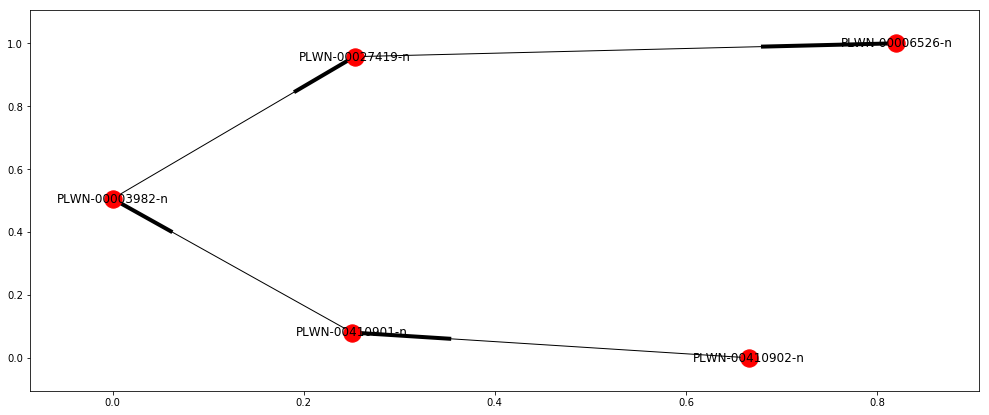

In [22]:
# Znajdź domknięcie przechodnie relacji hiperonimi dla pierwszego znaczenia wyrażenia 
# wypadek drogowy i przedstaw je w postaci grafu skierowanego.
from collections import deque

import networkx as nx
import numpy as np
import matplotlib.pyplot as plt


POS = 'n'
RELATION = 'hypernym'


synset = QUERY.lookUpSense('wypadek drogowy', 1, POS)
edges = []
vertices = deque([synset.wnid])
while vertices:
    vertex = vertices.popleft()
    for neighbour_vertex in QUERY.lookUpRelation(vertex, POS, RELATION):
        vertices.append(neighbour_vertex)
        edges.append((vertex, neighbour_vertex))
        print(QUERY.getSynset(neighbour_vertex, POS).toString())


%matplotlib inline
G = nx.DiGraph()
G.add_edges_from(edges)
plt.figure(figsize=(17,7)) 
nx.draw_networkx(G)

In [23]:
# Znajdź bezpośrednie hiponimy rzeczownika wypadek1.
POS = 'n'
RELATION = 'hyponym'

synset = QUERY.lookUpSense('wypadek', 1, POS)
for hyponym_synset in QUERY.lookUpRelation(synset.wnid, POS, RELATION):
    print(QUERY.getSynset(hyponym_synset, POS).toString())

PLWN-00001284-n  {zderzenie:2, kraksa:1}  ()
PLWN-00006486-n  {kolizja:2}  ()
PLWN-00016131-n  {karambol:1}  ()
PLWN-00034688-n  {zawał:2}  ()
PLWN-00034689-n  {tąpnięcie:1}  ()
PLWN-00241026-n  {kapotaż:1}  ()
PLWN-00258639-n  {wykolejenie:2}  ()
PLWN-00389170-n  {zakrztuszenie:1, zachłyśnięcie:1, aspiracja:3}  ()
PLWN-00410901-n  {wypadek komunikacyjny:1}  ()
PLWN-00411618-n  {katastrofa budowlana:1}  ()
PLWN-00436137-n  {wypadek jądrowy:1}  ()


In [24]:
# Znajdź hiponimy drugiego rzędu dla rzeczownika wypadek1.
POS = 'n'
RELATION = 'hyponym'

synset = QUERY.lookUpSense('wypadek', 1, POS)
for hyponym_order1 in QUERY.lookUpRelation(synset.wnid, POS, RELATION):
    for hyponym_order2 in QUERY.lookUpRelation(hyponym_order1, POS, RELATION):
        print(QUERY.getSynset(hyponym_order2, POS).toString())

PLWN-00235346-n  {czołówka:9, zderzenie czołowe:1}  ()
PLWN-00471555-n  {stłuczka:1}  ()
PLWN-00441365-n  {kolizja drogowa:1}  ()
PLWN-00037295-n  {obwał:1}  ()
PLWN-00410902-n  {wypadek drogowy:1}  ()


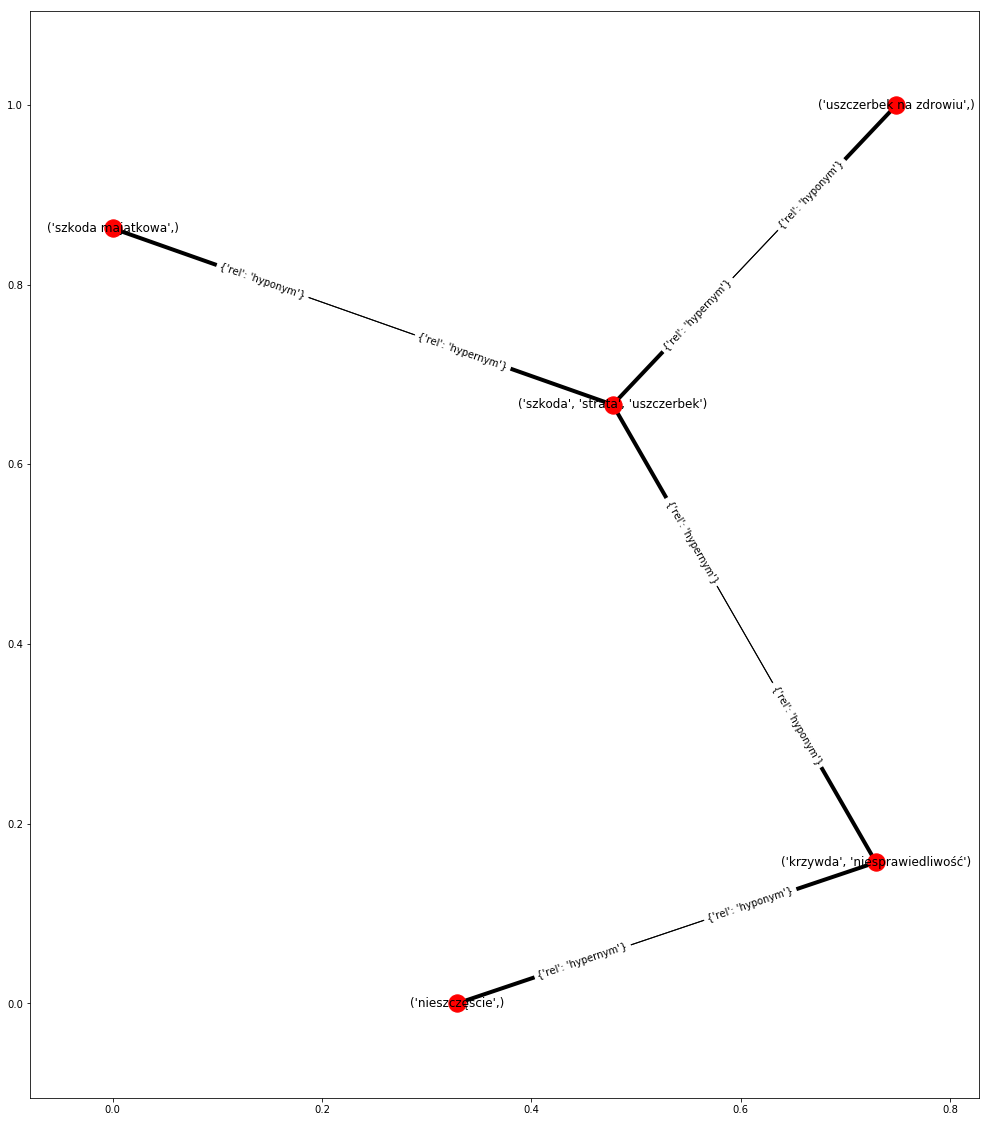

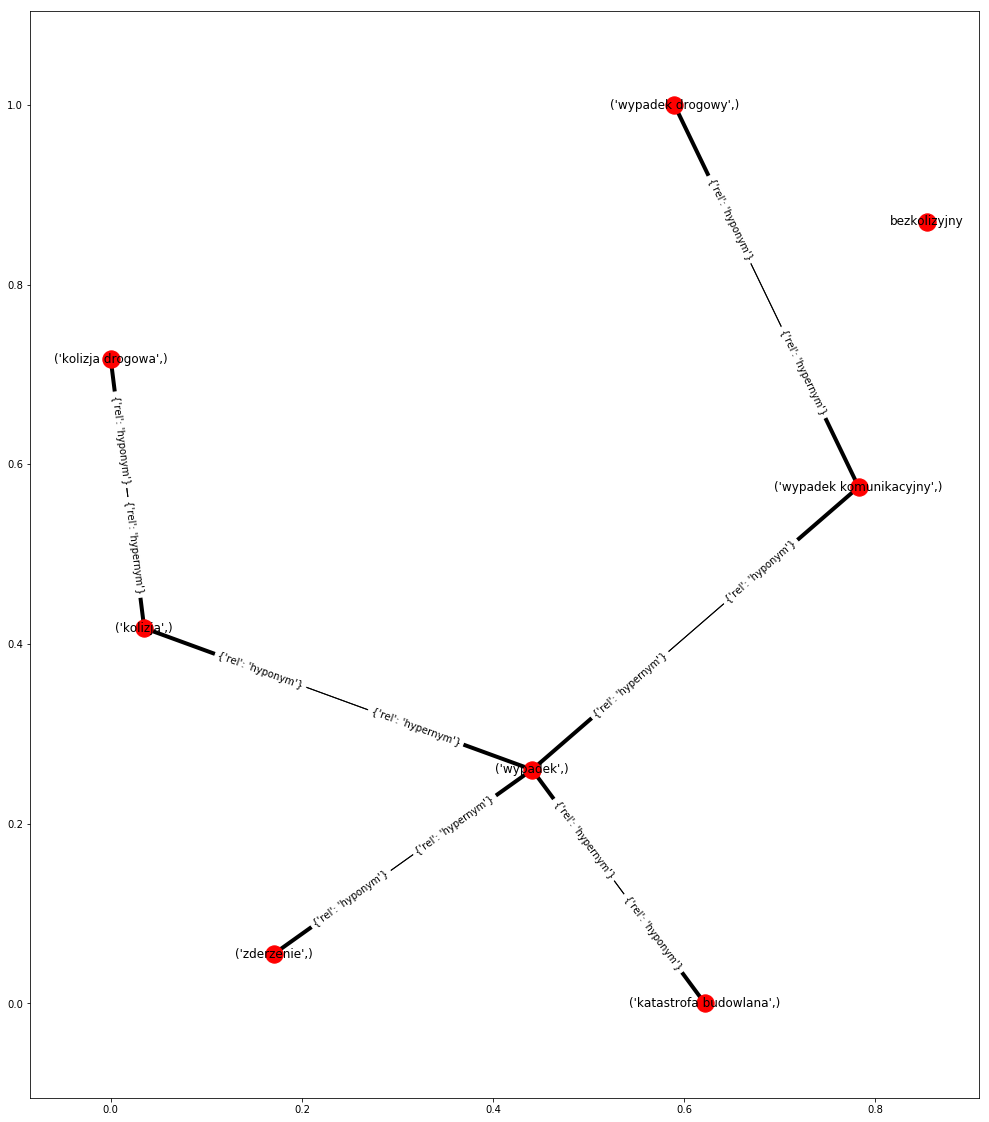

In [30]:
# Przedstaw w postaci grafu skierowanego (z etykietami dla krawędzi) relacje semantyczne 
# pomiędzy następującymi grupami leksemów:
from collections import defaultdict
from itertools import combinations

import networkx as nx
import numpy as np
import matplotlib.pyplot as plt


POS = 'n'

G1 = [
    ('szkoda', 2),
    ('strata', 1),
    ('uszczerbek', 1),
    ('szkoda majątkowa', 1),
    ('uszczerbek na zdrowiu', 1),
    ('krzywda', 1),
    ('niesprawiedliwość', 1),
    ('nieszczęście', 2)
]

G2 = [
    ('wypadek', 1),
    ('wypadek komunikacyjny', 1),
    ('kolizja', 2),
    ('zderzenie', 2),
    ('kolizja drogowa', 1),
#    ('bezkolizyjny', 2),
    ('katastrofa budowlana', 1),
    ('wypadek drogowy', 1)
]

# print(QUERY.lookUpSense('bezkolizyjny', 2, 'a'))


def find_connections(lexems):
    synsets = defaultdict(list)
    for literal, sense_num in lexems:
        synset = QUERY.lookUpSense(literal, sense_num, POS)
        synsets[synset.wnid].append(literal)

    synset_relations = []
    for synset_id in synsets:
        for other_synset_id, rel in QUERY.dat(POS)[synset_id].ilrs:
            if other_synset_id in synsets:
#                 synset_relations.append((synset_id, other_synset_id, rel))
                synset_relations.append((tuple(synsets[synset_id]), 
                                         tuple(synsets[other_synset_id]), 
                                         rel))
    return synset_relations
#    print(synset_relations)
#
#     relations = []
#     for literals in synsets.values():
#         for literal1, literal2 in combinations(literals, 2):
#             relations.extend([(literal1, literal2, 'synonym'), 
#                               (literal2, literal1, 'synonym')])
#
#     for synset_id, other_synset_id, rel in synset_relations:
#         for literal1 in synsets[synset_id]:
#             for literal2 in synsets[other_synset_id]:
#                 relations.append((literal1, literal2, rel))
#     return relations


def draw_graph(edges, nodes=None):
    plt.figure(figsize=(17,20)) 
    G = nx.DiGraph()
    if nodes:
        G.add_nodes_from(nodes)
    for literal1, literal2, rel in edges:
        G.add_edge(literal1, literal2, rel=rel)
    pos = nx.spring_layout(G)
    nx.draw_networkx(G, pos=pos)
    nx.draw_networkx_edge_labels(G, pos=pos, label_pos=0.3)


%matplotlib inline
draw_graph(find_connections(G1))
draw_graph(find_connections(G2), nodes=['bezkolizyjny'])


In [18]:
# Znajdź wartość miary pokrewieństwa semantycznego Leacocka-Chodorowa 
# pomiędzy następującymi parami leksemów 
POS = 'n'
RELATION = 'hypernym'

MAX_DEPTH = max(QUERY.getMaxDepth(wnid, POS, RELATION) for wnid in QUERY.m_ndat)
print(MAX_DEPTH)

35


In [19]:
import math


LEXEMS = [
    (('szkoda', 2), ('wypadek', 1)),
    (('kolizja', 2), ('szkoda majątkowa', 1)),
    (('nieszczęście', 2), ('katastrofa budowlana', 1))
]
MAX_DEPTH_WITH_FAKE_ROOT = MAX_DEPTH + 1

def path_len(wnid1, wnid2):
    path_length = 2 * MAX_DEPTH_WITH_FAKE_ROOT
    for key1, val1 in QUERY.getReach(wnid1, POS, RELATION, True):
        for key2, val2 in QUERY.getReach(wnid2, POS, RELATION, True):
            if key1 == key2:
                if val1 + val2 < path_length:
                    path_length = val1 + val2

    return path_length - 1 # because the common node was counted twice


for lexem1, lexem2 in LEXEMS:
    synset1 = QUERY.lookUpSense(lexem1[0], lexem1[1], POS)
    synset2 = QUERY.lookUpSense(lexem2[0], lexem2[1], POS)
    distance = path_len(synset1.wnid, synset2.wnid)
    lch_similarity = -1.0 * math.log10(distance / (2.0 * MAX_DEPTH_WITH_FAKE_ROOT))
    print(f'LCH similarity between {lexem1} and {lexem2} is {lch_similarity:0.4f} '
          f'with distance {distance}')

LCH similarity between ('szkoda', 2) and ('wypadek', 1) is 1.2553 with distance 4
LCH similarity between ('kolizja', 2) and ('szkoda majątkowa', 1) is 1.0792 with distance 6
LCH similarity between ('nieszczęście', 2) and ('katastrofa budowlana', 1) is 0.9031 with distance 9
